### LAB3-Asíncrono-Sergio Andre Bustamante Salcedo-20213170 

# Tarea Asíncrona (2 puntos)

## Pregunta 1 (1 punto)

El muestreo de la señal:

$$ x(t) = 5 \cos(25 \pi t^2) \sin(90 \pi t) $$

a una frecuencia de 1000 Hz, genera \(x[n]\). Tomando en cuenta 256 bloques de 128 muestras cada uno, desarrolle los siguientes ítems, compare y comente lo obtenido:

#### a) Calcule y grafique los periodogramas utilizando los métodos Welch y Bartlett con traslape del 50% y ventana de tipo Hann. Analice las diferencias entre ambos métodos. ¿Cuál es más adecuado para observar los componentes de frecuencia de la señal?


In [30]:
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Periodograma utilizando método Barlett')

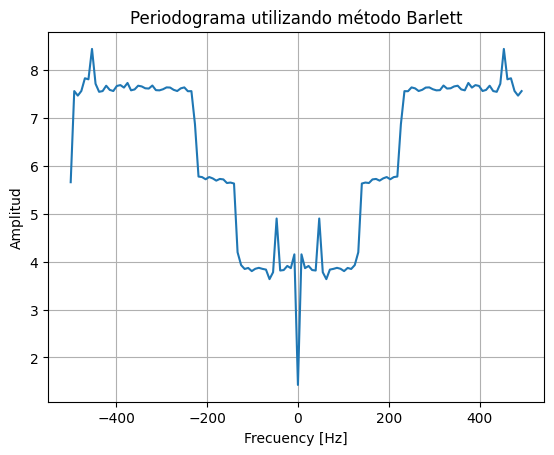

In [31]:
#Metodo Barlett
fs = 1000
L = 128 #cantidad de muestras
M = 256 #cantidad de segmentos de L muestras
N = M*L #cantidad total de muestras

n = np.arange(N)/fs
x = 5 * np.cos(25 * np.pi * n**2) * np.sin(90 * np.pi * n)

#Inicializamos matriz
Xbar = np.zeros([M,L])
for m in range (M):
    xm = x[m*L:(m+1)*L]
    Xbar[m,:] = np.abs(np.fft.fft(xm))**2 / L

Xbar = np.fft.fftshift(Xbar,axes=1)
fk = (np.arange(L) - L/2) * fs / L
per = np.mean(Xbar,axis=0)
plt.figure()
plt.plot(fk,per)
plt.grid('on')
plt.xlabel('Frecuency [Hz]')
plt.ylabel('Amplitud')
plt.title('Periodograma utilizando método Barlett')
#Se grafica del índice 0 hasta el 127 porque es una señal de 128 muestras

Text(0.5, 1.0, 'Periodograma utilizando método Welch con ventana tipo Hann y traslape de 50%')

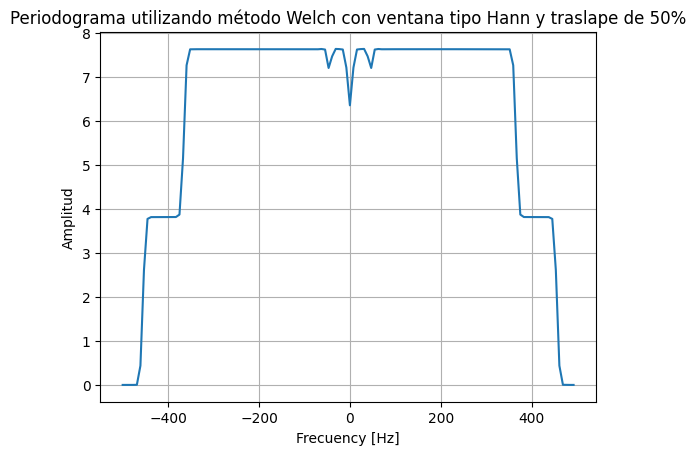

In [32]:
#Metodo Welch
Lo = int(0.5*L) #50% de L
w = np.hanning(L) #ventana tipo Hann
w = w / np.sqrt(np.mean(np.abs(w)**2))
Xperw = np.zeros([M,L])
for m in range(M):
    xmw = w*x[m*(L-Lo):m*(L-Lo) + L]
    Xperw[m,:] = np.abs(np.fft.fft(xmw))**2 / L
Xperw = np.fft.fftshift(Xperw,axes=1)
perw = np.mean(Xperw,axis=0)
plt.figure()
plt.plot(fk,perw)
plt.grid('on')
plt.xlabel('Frecuency [Hz]')
plt.ylabel('Amplitud')
plt.title('Periodograma utilizando método Welch con ventana tipo Hann y traslape de 50%')

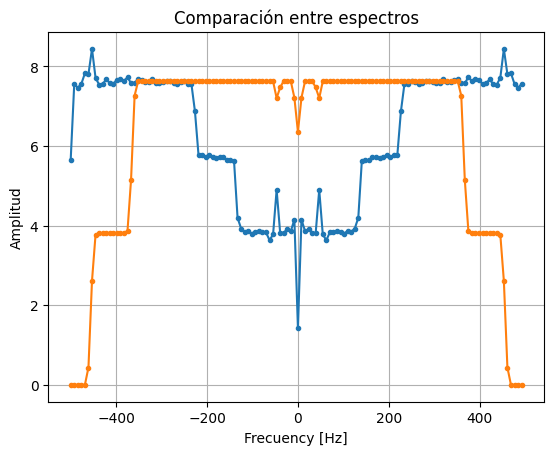

In [33]:
# Comparando espectros
fig = plt.figure()
plt.plot(fk,per,'.-')
plt.plot(fk,perw,'.-')
plt.xlabel('Frecuency [Hz]')
plt.title('Comparación entre espectros')
plt.ylabel('Amplitud')
plt.grid('on')

In [34]:
#Analizamos ventana de tipo Hann
print(w)

[0.00000000e+00 1.00297754e-03 4.00945571e-03 9.01207715e-03
 1.59985996e-02 2.49519259e-02 3.58501457e-02 4.86665893e-02
 6.33698927e-02 7.99240744e-02 9.82886236e-02 1.18418599e-01
 1.40264740e-01 1.63773584e-01 1.88887602e-01 2.15545335e-01
 2.43681548e-01 2.73227386e-01 3.04110547e-01 3.36255452e-01
 3.69583440e-01 4.04012950e-01 4.39459728e-01 4.75837029e-01
 5.13055832e-01 5.51025057e-01 5.89651786e-01 6.28841494e-01
 6.68498276e-01 7.08525086e-01 7.48823971e-01 7.89296314e-01
 8.29843072e-01 8.70365019e-01 9.10762993e-01 9.50938132e-01
 9.90792121e-01 1.03022743e+00 1.06914756e+00 1.10745725e+00
 1.14506277e+00 1.18187209e+00 1.21779512e+00 1.25274395e+00
 1.28663307e+00 1.31937953e+00 1.35090321e+00 1.38112696e+00
 1.40997681e+00 1.43738217e+00 1.46327597e+00 1.48759484e+00
 1.51027927e+00 1.53127375e+00 1.55052690e+00 1.56799161e+00
 1.58362514e+00 1.59738922e+00 1.60925018e+00 1.61917899e+00
 1.62715136e+00 1.63314776e+00 1.63715354e+00 1.63915888e+00
 1.63915888e+00 1.637153

#### Al comparar ambas gráficas podemos apreciar que el periodograma hallado con el método Welch con una ventana tipo Hann tiene diferencias en la amplitud con el método Barlett debido a que la ventana al tener una amplitud, se adiciona cierto valor en la amplitud cuando se multiplica con x y posteriormente se repite el proceso, por lo que es coherente tener una diferencia entre las amplitudes, entonces podemos afirmar que al aplicar enventanado añadimos distorsión en amplitud. Asimismo, podemos afirmar que al usar la ventana la ventana tipo Hann se modifican los valores de los segmentos para suavizar discontinuidades entre ellos. Esta ventana, como lo podemos apreciar en los valores reduce el valor de las frecuencias cercanas a los bordes de cada segmento, lo que causa una distorsión en amplitud bastante notoria. Finalmente, al ser de tipo Hann tiene forma cosenoidal y hace que las frecuencias altas se atenúen más, lo que resulta en un espectro mucho más suavizado pero con menor resolución en algunas frecuencias.

#### Como ventaja tenemos que en Barlett no se adiciona distorsión en la amplitud, sin embargo, como desventaja tiene menor resolución en frecuencias y mayor fluctuación de las amplitudes (en frecuencia).

#### Por otro lado, con el método Welch tenemos una mejor resolución frecuencial y suavizado de las amplitudes debido a la ventana Hann y el traslape del 50%. La desventaja es que se pierde resolución temporal debido al traslape y a la forma de la ventana, pero mejora la precisión en la detección de componentes en frecuencia.

### Pregunta 2 (1 punto)

Se tiene el siguiente sistema de diferencias:

$$y[n] - 1.3829y[n-1] + 0.4128y[n-2] = 0.0675x[n] + 0.1349x[n-1] + 0.0675x[n-2]$$

a) Utilizando ecuaciones recursivas, calcule y grafique la respuesta de entrada cero con $y[-1] = 0$ y $y[-2] = 1$ para $-2 \leq n \leq 100$.



In [35]:
import numpy as np
import matplotlib.pyplot as plt

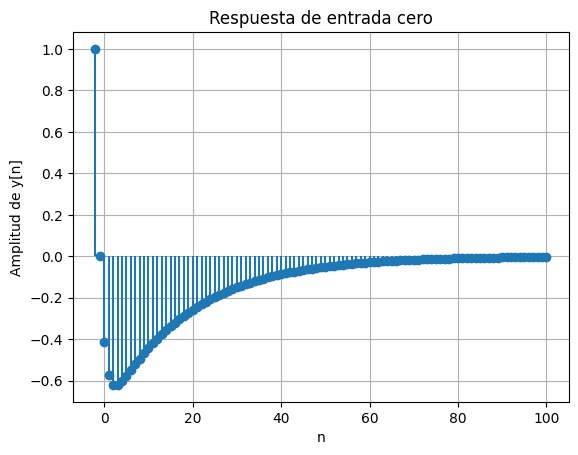

In [36]:
# Parámetros de la ecuación
a1 = 1.3829
a2 = -0.4128

# Condiciones iniciales
n_min = -2
n_max = 100
y = np.zeros(n_max - n_min + 1)

# Inicializando las condiciones iniciales
y[0] = 1
y[1] = 0  

# Calcular la respuesta recursiva
for n in range(2, len(y)):
    y[n] = a1 * y[n-1] + a2 * y[n-2]

# Gráfica de la respuesta
n_vals = np.arange(n_min, n_max+1)
plt.stem(n_vals, y, basefmt=" ")
plt.title("Respuesta de entrada cero")
plt.xlabel("n")
plt.ylabel("Amplitud de y[n]")
plt.grid(True)
plt.show()

#### Podemos apreciar que la respuesta en entrada cero de la ecuación de diferencias presentada tiende a cero como valor mientras que n aumenta de valor.